In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
# pd.set_option('max_colwidth', 50)
# set this if you need to

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [82]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
businesses.head()
# dtype casts the column as a specific data type

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312.0,NaN,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104
3,31,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,NaN,H24,346882.0,NaN,Norman Antiforda,2801 Leavenworth St,San Francisco,CA,94133
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,NaN,H24,340024.0,10/10/2001,"HARB, CHARLES AND KRISTIN",1150 SANCHEZ,S.F.,CA,94114


In [83]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=True)
inspections=inspections.rename(columns = {'date':'inspection_date'})
inspections.columns

Index([u'business_id', u'Score', u'inspection_date', u'type'], dtype='object')

In [84]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=True)
violations=violations.rename(columns = {'date':'violations_date'})
violations.columns

Index([u'business_id', u'violations_date', u'ViolationTypeID',
       u'risk_category', u'description'],
      dtype='object')

In [102]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html

restaurant_scores  = inspections.append(violations)#, on='business_id')
#restaurant_scores  = pd.concat([inspections, violations],axis = 1)
restaurant_scores  = pd.merge(restaurant_scores, businesses, on='business_id', how='right')
#restaurant_scores.head()
#len(restaurant_scores)
restaurant_scores.shape

(68454, 23)

In [86]:
print restaurant_scores.isnull().sum()
#restaurant_scores.shape
print businesses.shape
print inspections.shape
print violations.shape

Score                   53219
ViolationTypeID         28833
business_id                 0
description             28843
inspection_date         41223
risk_category           28843
type                    41223
violations_date         28833
name                        2
address                     0
city                    10636
postal_code              1742
latitude                18163
longitude               18163
phone_number            49109
TaxCode                     8
business_certificate     8564
application_date        18192
owner_name                127
owner_address             207
owner_city                311
owner_state               320
owner_zip                 492
dtype: int64
(7544, 16)
(27285, 4)
(39720, 5)


In [103]:
# 2 Which ten business have had the most inspections?
#restaurant_scores['business_id'].value_counts()

restaurant_scores.groupby('name').type.count().sort_values(ascending=False).head(15)


name
Peet's Coffee & Tea           87
Starbucks Coffee              71
Whole Foods Market            54
STARBUCKS                     49
Specialty's Cafe & Bakery     48
STARBUCKS COFFEE              44
San Francisco Soup Company    44
KENTUCKY FRIED CHICKEN        32
Subway Sandwiches             31
Lee's Deli                    31
Mixt Greens                   30
Quickly                       27
Starbucks                     27
Philz Coffee                  25
PEET'S COFFEE & TEA           24
Name: type, dtype: int64

In [104]:
# 3 Group and count the inspections by type
restaurant_scores.groupby('type').business_id.count().sort_values(ascending=False)

type
Routine - Unscheduled                15451
Reinspection/Followup                 5373
New Ownership                         1873
Complaint                             1633
New Construction                      1607
Non-inspection site visit              836
Complaint Reinspection/Followup        163
Structural Inspection                  122
Foodborne Illness Investigation        102
Routine - Scheduled                     63
Administrative or Document Review        4
Special Event                            2
Multi-agency Investigation               2
Name: business_id, dtype: int64

In [89]:
#restaurant_scores.columns

restaurant_scores['inspection_date'] = pd.to_datetime(restaurant_scores['inspection_date'].astype(str), format='%Y%m%d')
restaurant_scores['violations_date'] = pd.to_datetime(restaurant_scores['violations_date'].astype(str), format='%Y%m%d')
restaurant_scores['inspection_year'] = restaurant_scores['inspection_date'].dt.year 
restaurant_scores['inspection_month'] = restaurant_scores['inspection_date'].dt.month 




In [105]:
print restaurant_scores.columns

Index([u'Score', u'ViolationTypeID', u'business_id', u'description',
       u'inspection_date', u'risk_category', u'type', u'violations_date',
       u'name', u'address', u'city', u'postal_code', u'latitude', u'longitude',
       u'phone_number', u'TaxCode', u'business_certificate',
       u'application_date', u'owner_name', u'owner_address', u'owner_city',
       u'owner_state', u'owner_zip'],
      dtype='object')


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011EE6160>], dtype=object)

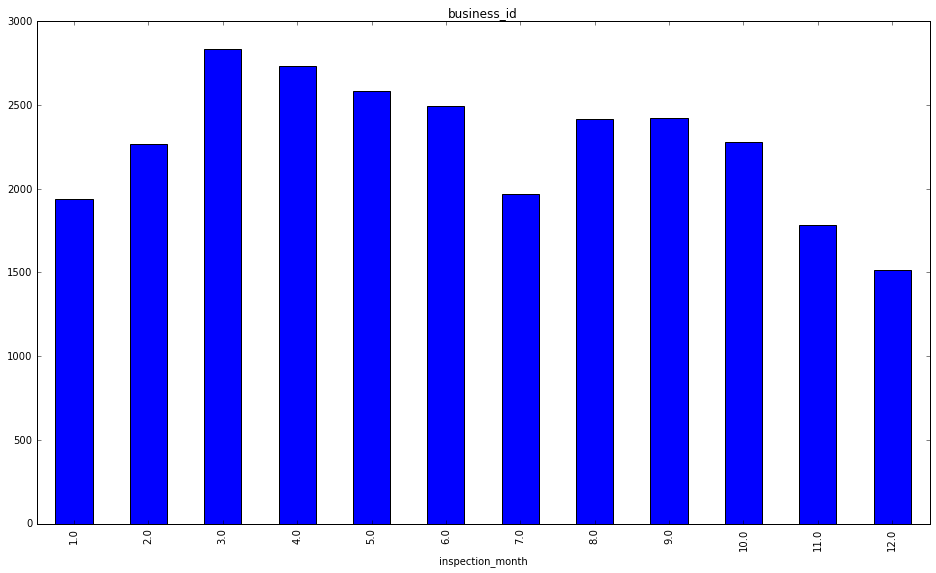

In [91]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap

#restaurant_scores.groupby(['inspection_year','inspection_month']).business_id.count().unstack(0).plot(kind = 'bar', subplots = True, figsize = (16,9))
restaurant_scores.groupby(['inspection_month']).business_id.count().plot(kind = 'bar', subplots = True, figsize = (16,9))

In [92]:
# 5 Which zip code contains the most high risk violations?
restaurant_scores[restaurant_scores.risk_category == 'High Risk'].groupby('postal_code').business_id.count().order(ascending=False).head(10)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


postal_code
94133    530
94110    501
94103    496
94109    396
94102    390
94122    385
94108    257
94107    249
94115    223
94114    219
Name: business_id, dtype: int64

In [93]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?

In [94]:
# 7 Examining the descriptions, what is the most common violation?
restaurant_scores.groupby('description').business_id.count().sort_values(ascending=False).head()

description
Unclean or degraded floors walls or ceilings                          3395
Moderate risk food holding temperature                                2617
Inadequate and inaccessible handwashing facilities                    2440
Unapproved or unmaintained equipment or utensils                      2326
Wiping cloths not clean or properly stored or inadequate sanitizer    2289
Name: business_id, dtype: int64

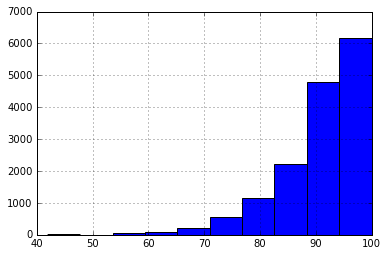

In [95]:
# 8 Create a hist of the scores with 10 bins
restaurant_scores.Score.hist(bins=10)

In [96]:
# 9 Can you predict risk category based on the other features in this dataset?

In [97]:
# 10 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/

restaurant_scores[restaurant_scores.risk_category == 'High Risk'].sort(['Score'],ascending =False).head(5)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Score,ViolationTypeID,business_id,description,inspection_date,risk_category,type,violations_date,name,address,...,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip,inspection_year,inspection_month
85,NaN,103109.0,58.0,Unclean or unsanitary food contact surfaces,NaT,High Risk,NaN,2014-07-25,Oasis Grill,91 Drumm St,...,H24,954377.0,NaN,Mohammad Zughaiyir,91 Drumm St,San Francisco,CA,94111,NaN,NaN
86,NaN,103114.0,58.0,High risk vermin infestation,NaT,High Risk,NaN,2014-07-25,Oasis Grill,91 Drumm St,...,H24,954377.0,NaN,Mohammad Zughaiyir,91 Drumm St,San Francisco,CA,94111,NaN,NaN
113,NaN,103112.0,66.0,No hot water or running water,NaT,High Risk,NaN,2014-05-19,STARBUCKS,1800 IRVING St,...,H24,911744.0,NaN,STARBUCKS COFFEE COMPANY,1800 IRVING St,S.F.,CA,94122,NaN,NaN
123,NaN,103109.0,67.0,Unclean or unsanitary food contact surfaces,NaT,High Risk,NaN,2016-04-01,Revolution Cafe,3248 22nd St,...,H24,NaN,10/01/2005,22nd Street LLC,3248 22nd St.,SF,CA,94110,NaN,NaN
151,NaN,103103.0,73.0,High risk food holding temperature,NaT,High Risk,NaN,2015-07-17,DINO'S UNCLE VITO,2101 Fillmore St,...,H24,186790.0,02/01/1989,STAVRAKIKIS DINO,\t2101 FILLMORE ST,SAN FRANCISCO,CA,94115,NaN,NaN


In [ ]:
############################
### A Little More Morbid ###
############################

In [ ]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()

In [ ]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race
killings = killings.rename(columns = {'lawenforcementagency':'agency','raceethnicity':'race'})
killings.head()

In [ ]:
# 2. Show the count of missing values in each column
killings.isnull().sum()

In [ ]:
# 3. replace each null value in the dataframe with the string "Unknown"
killings.streetaddress.fillna(value='Unknown', inplace=True)

In [ ]:
# 4. How many killings were there so far in 2015?
killings.groupby('year').year.count()

In [ ]:
# 5. Of all killings, how many were male and how many female?
killings.groupby('gender').year.count()

In [ ]:
# 6. How many killings were of unarmed people?
killings[killings.armed=='No'].armed.count()

In [ ]:
# 7. What percentage of all killings were unarmed?
(killings[killings.armed=='No'].armed.count()*0.1)/(len(killings)*0.1)

In [ ]:
# 8. What are the 5 states with the most killings?
killings.state.value_counts().head(5)

In [ ]:
# 9. Show a value counts of deaths for each race
killings.race.value_counts()

In [ ]:
# 10. Display a histogram of ages of all killings
killings.age.hist(bins=10)

In [ ]:
# 11. Show 6 histograms of ages by race
killings.age.hist(by=killings.race,figsize = (16,9), color = 'r', sharex = True, sharey = True)

In [ ]:
# 12. What is the average age of death by race?
killings.groupby('race').age.mean()

In [ ]:
# 13. Show a bar chart with counts of deaths every month

killings.groupby(['month','race']).month.count().unstack('race').plot(kind = 'bar',  figsize = (16,9), stacked = True)
#killings.month.value_counts().plot(kind='bar',  title='# of deaths by month', columns = ['race'])
plt.title('# of deaths by race')
plt.xlabel('month')
plt.ylabel('# of deaths')


In [ ]:
###################
### Less Morbid ###
###################

In [ ]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()
majors.columns

In [ ]:
# 1. Delete the columns (employed_full_time_year_round, major_code)
majors.drop(['Employed_full_time_year_round', 'Major_code' ],inplace=True,axis=1)

In [ ]:
# 2. Show the cout of missing values in each column
majors.isnull().sum()


In [ ]:
# 3. What are the top 10 highest paying majors?
majors.head()
majors.groupby('Major').Median.sum().sort_values(ascending=False).head(10)

In [ ]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!
majors.groupby('Major').Median.sum().sort_values(ascending=False).head(10).plot(kind = 'bar',title = 'Highest paying Majors')
plt.xlabel('Major')
plt.ylabel('Income')

In [ ]:
# 5. What is the average median salary for each major category?
majors.groupby('Major_category').Median.mean().sort_values(ascending=False)

In [ ]:
# 6. Show only the top 5 paying major categories
majors.groupby('Major_category').Median.sum().sort_values(ascending=False)

In [ ]:
# 7. Plot a histogram of the distribution of median salaries

majors.Median.hist(bins = 10)

In [ ]:
# 8. Plot a histogram of the distribution of median salaries by major category
#majors.Median.hist(by=majors.Major_category, bins = 10) 
majors.Median.hist(by=majors.Major_category, bins = 10, sharex=True, sharey=True,color='r', alpha=0.75, figsize = (16,9))

In [ ]:
# 9. What are the top 10 most UNemployed majors?
majors.groupby('Major').Unemployed.sum().sort_values(ascending=False).head(10)

In [ ]:
# What are the unemployment rates?
majors.groupby('Major').Unemployment_rate.sum().sort_values(ascending=False).head(10)

In [ ]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?
majors.groupby('Major_category').Unemployed.mean().sort_values(ascending=False)


In [ ]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042
majors['Sample_employment_rate'] = (majors.Employed * 0.1) / (majors.Total * 0.1)

In [ ]:
# 12. Create a "sample_unemployment_rate" column
# this column should be 1 - "sample_employment_rate"
majors['Sample_unemployment_rate'] = 1 - majors.Sample_employment_rate
majors.head()